In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/musical-instruments-sound-dataset/Metadata_Train.csv
/kaggle/input/musical-instruments-sound-dataset/Metadata_Test.csv
/kaggle/input/musical-instruments-sound-dataset/Test_submission/Test_submission/phaze-giant-bass-69687.wav
/kaggle/input/musical-instruments-sound-dataset/Test_submission/Test_submission/Sad-Violin-G-www.fesliyanstudios.com.wav
/kaggle/input/musical-instruments-sound-dataset/Test_submission/Test_submission/pop-drums-loops-3-11278.wav
/kaggle/input/musical-instruments-sound-dataset/Test_submission/Test_submission/paft-drunk-freestyle-drum-22227.wav
/kaggle/input/musical-instruments-sound-dataset/Test_submission/Test_submission/guitar-soundtrack-55233.wav
/kaggle/input/musical-instruments-sound-dataset/Test_submission/Test_submission/Va-ord-E4-ff-4c.wav
/kaggle/input/musical-instruments-sound-dataset/Test_submission/Test_submission/guitar-swellsolo-34241.wav
/kaggle/input/musical-instruments-sound-dataset/Test_submission/Test_submission/world-drum-beat-7621

# <h1 style='background:#3b3a30; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#c1502e'><center>Table of contents</center></h1> 
1. [Introduction](#1)   
2. [Importing libraries](#2)
3. [Explore the csv file](#3)  
4. [Approach-1](#4)
5. [Approach-2](#5)
6. [Model](#6)     
7. [Model Test](#7)     
8.  [Thank You](#8)

<a id="1"></a> 

# <h1 style='background:#3b3a30; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#c1502e'><center>Introduction</center></h1> 


    
Here we have  4 types of different classes of musical instruments  .

- **GuitarSound - 700 Sounds in Train Set**
- **DrumSouund - 700 Sounds in Train Set**
- **ViolinSound - 700 Sound in Train Set**
- **PianoSound - 528 Sound in Train Set**

In Test Set Total **80 audio files are present** , 20 From Each Class. Our work is to **classify them** according to their classes .
<font>

<img src="https://www.scienceabc.com/wp-content/uploads/2019/08/Different-ethnic-music-instruments.-Save-culture.-Ethnic-world.-National-instruments.-ImageAnna_Kuzminas.jpg" width=400 height=550/>

<a id="2"></a> 

# <h1 style='background:#3b3a30; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#c1502e'><center> Importing Libraries</center></h1> 

In [2]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
import librosa
import librosa.display

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import Adam

<a id="3"></a> 

# <h1 style='background:#3b3a30; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#c1502e'><center>Exploring csv Files</center></h1> 

In [3]:


df=pd.read_csv("/kaggle/input/musical-instruments-sound-dataset/Metadata_Train.csv")
df2=pd.read_csv("/kaggle/input/musical-instruments-sound-dataset/Metadata_Test.csv")

In [4]:
df

,FileName,Class
0,1-E1-Major 00.wav,Sound_Guitar
1,1-E1-Major 01.wav,Sound_Guitar
2,1-E1-Major 02.wav,Sound_Guitar
3,1-E1-Major 03.wav,Sound_Guitar
4,1-E1-Major 04.wav,Sound_Guitar
...,...,...
2624,strange-piano-73881.wav,Sound_Piano
2625,the-last-piano-112677.wav,Sound_Piano
2626,this-is-war-version-e-95411.wav,Sound_Piano
2627,tired-ghosts-piano-65013.wav,Sound_Piano


Sound_Guitar    700
Sound_Drum      700
Sound_Violin    700
Sound_Piano     529
Name: Class, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


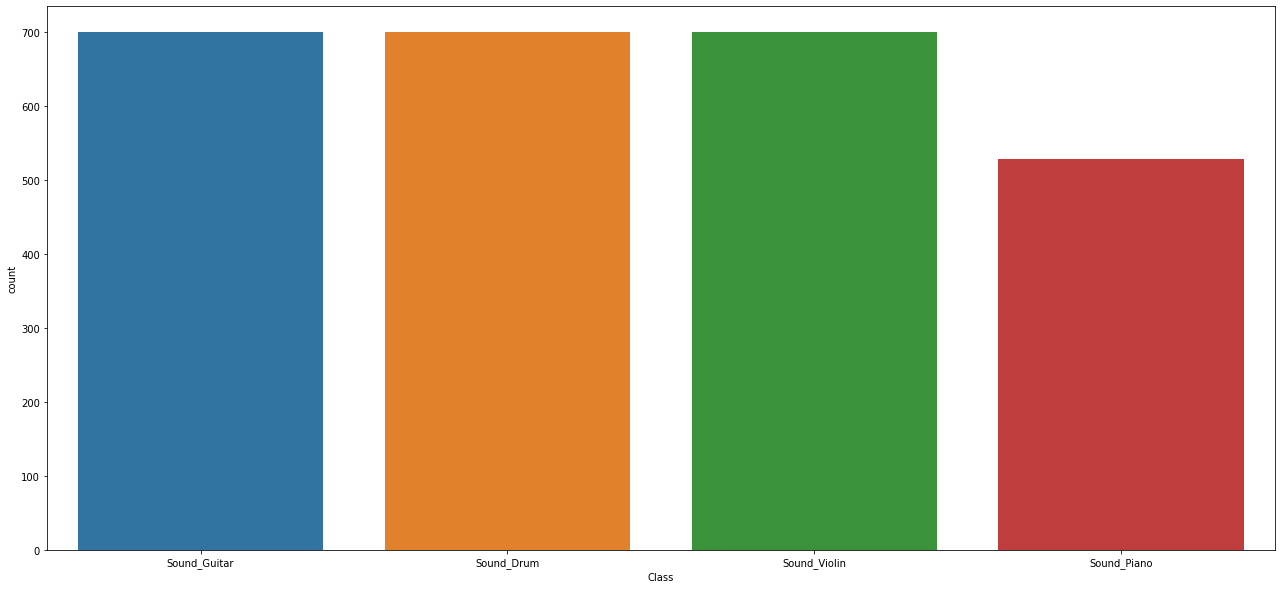

In [5]:
# Visualizing Tag column

print(df['Class'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(df['Class'])
plt.xticks(rotation=0)

plt.show()

Sound_Guiatr    20
Sound_Drum      20
Sound_Violin    20
Sound_Piano     20
Name: Class, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


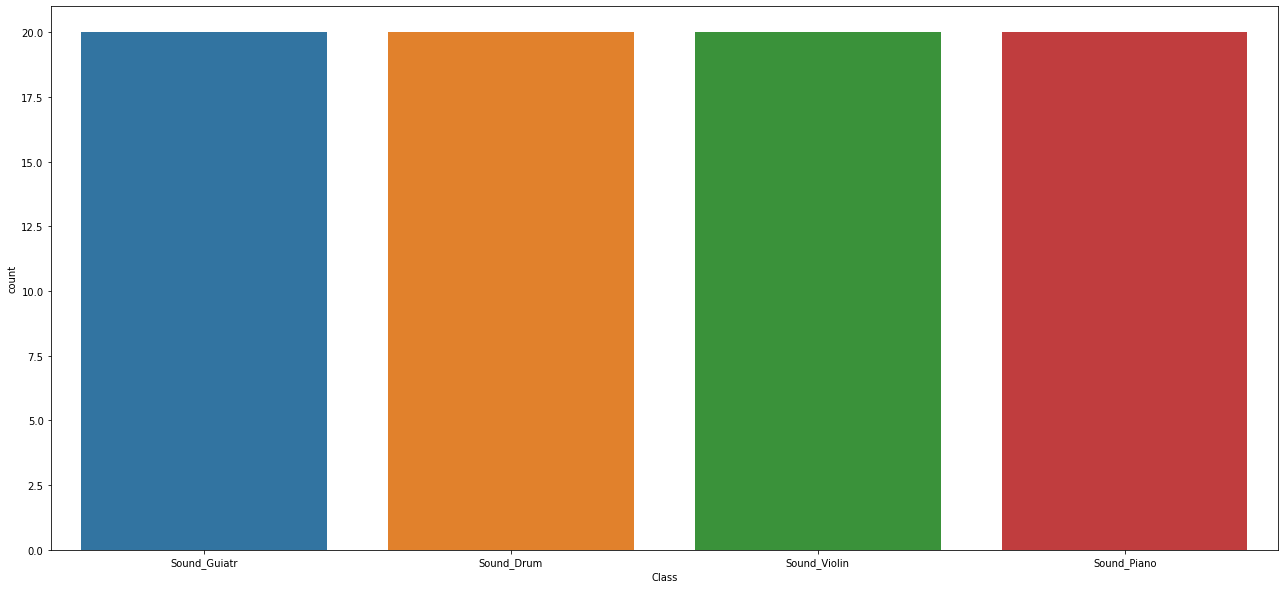

In [6]:
print(df2['Class'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(df2['Class'])
plt.xticks(rotation=0)

plt.show()

<a id="4"></a> 
# <h1 style='background:#3b3a30; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#c1502e'><center>Approach-1</center></h1> 

Here we will extract some features from each audio files & then we would remove the less information part of each audio

In [7]:

df.set_index('FileName',inplace=True)

for f in df.index:
    rate, signal = wavfile.read('/kaggle/input/musical-instruments-sound-dataset/Train_submission/Train_submission/' + f)
    df.at[f, 'length'] = signal.shape[0]/rate

classes = list(np.unique(df.Class))
class_dist = df.groupby(['Class'])['length'].mean()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.


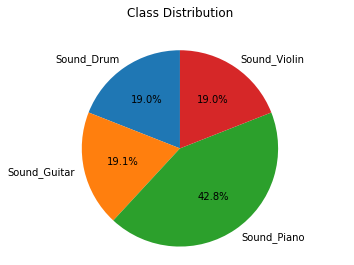

In [8]:
# Volume of each labels

fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()
df.reset_index(inplace=True)


# <h1 style='background:#3b3a30; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#c1502e'><center>Feature Extraction</center></h1> 


In [9]:
# Calculate FFT

def calc_fft(y,sr):
    
    n=len(y)
    freq=np.fft.rfftfreq(n,d=1/sr)
    Y=abs(np.fft.rfft(y)/n)
    return (Y,freq)

In [10]:
# Valuable Info In Sample

def Envelope(y, rate, threshold):
    mask = []
    #we want a rolling window so we create series as it is easy with it
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/4), min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
            
    return mask

In [11]:
# Taking One Audio from each class 
# Applying some FE methods

signals = {}
fft = {}
fnames=[]
mfccs = {}


for c in classes:
    wav_file = df[df.Class == c].iloc[0,0]
    fnames.append('/kaggle/input/musical-instruments-sound-dataset/Train_submission/Train_submission/'+wav_file)
    signal, rate = librosa.load('/kaggle/input/musical-instruments-sound-dataset/Train_submission/Train_submission/'+wav_file,sr=44100)
    mask = Envelope(signal, rate, 0.0005) #0.0005 is experimental
    signal = signal[mask]
    signals[c] = signal
    fft[c] = calc_fft(signal, rate)
    



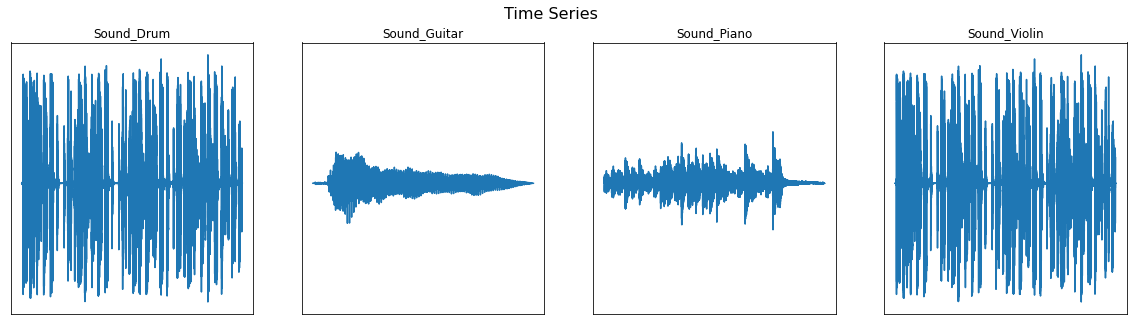

In [12]:
# Plotting Signals

def plot_signals(signals):
    fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for x in range(4):
            axes[x].set_title(list(signals.keys())[i])
            axes[x].plot(list(signals.values())[i])
            axes[x].get_xaxis().set_visible(False)
            axes[x].get_yaxis().set_visible(False)
            i += 1
plot_signals(signals)
plt.show()

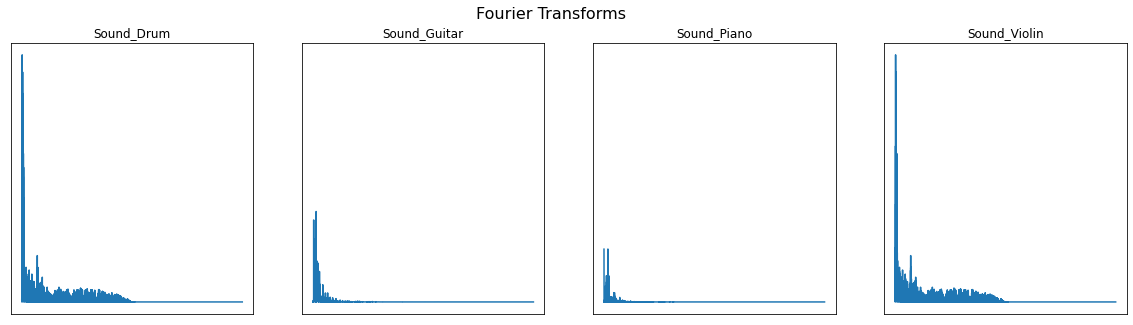

In [13]:
# Plotting ffts

def plot_fft(fft):
    fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for x in range(4):
        
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x].set_title(list(fft.keys())[i])
            axes[x].plot(freq, Y)
            axes[x].get_xaxis().set_visible(False)
            axes[x].get_yaxis().set_visible(False)
            i += 1
plot_fft(fft)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00017683 -0.00011937
 -0.00011121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00017683 -0.00011937
 -0.00011121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00017683 -0.00011937
 -0.00011121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Pass y=[ 0.          0.          0.       

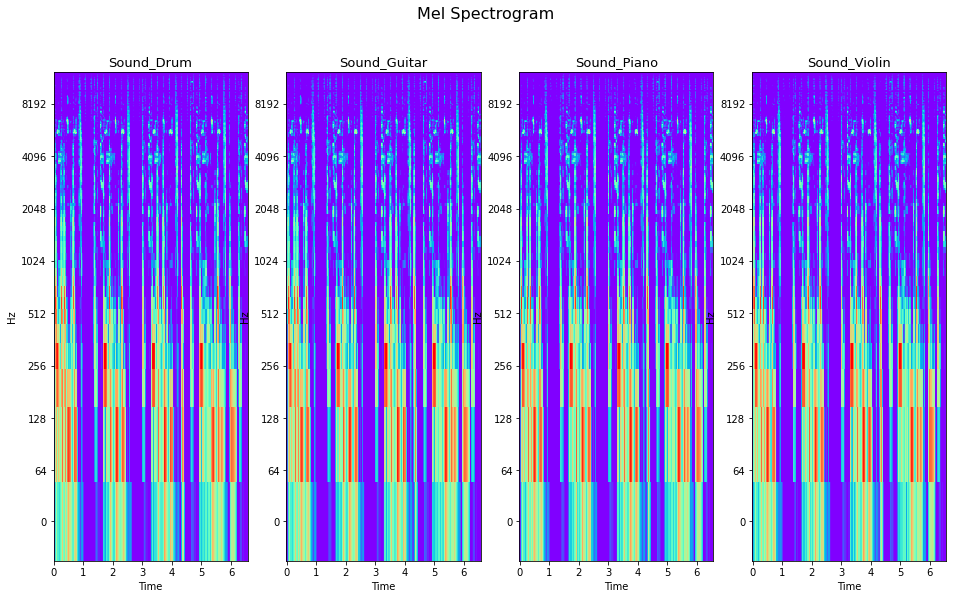

In [14]:
# Mel Spectograms

data=[]
hop_length = 512 
ename=list(signals.keys())
for i in fnames:
    y_data,sr_data=librosa.load(fnames[0])
    data.append(y_data)

        
c1 = librosa.feature.melspectrogram(data[0], sr=25000)
S_c1 = librosa.amplitude_to_db(c1, ref=np.max)

c2 = librosa.feature.melspectrogram(data[1], sr=25000)
S_c2 = librosa.amplitude_to_db(c2, ref=np.max)

c3 = librosa.feature.melspectrogram(data[2], sr=25000)
S_c3 = librosa.amplitude_to_db(c3, ref=np.max)

c4 = librosa.feature.melspectrogram(data[3], sr=25000)
S_c4 = librosa.amplitude_to_db(c4, ref=np.max)



# === PLOT ====
fig, ax = plt.subplots(1, 4, figsize=(16, 9))
fig.suptitle('Mel Spectrogram', fontsize=16)


librosa.display.specshow(S_c1, sr =25000, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[0])
librosa.display.specshow(S_c2, sr=25000, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[1])
librosa.display.specshow(S_c3, sr=25000, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[2])
librosa.display.specshow(S_c4, sr=25000, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[3])


for i, name in zip(range(0, 1*4), ename):
    x = i % 4
    ax[x].set_title(name, fontsize=13)

**<span style="color:#3b3a30;">Now the audios are down sampled . We could run this Envelope func to each file & then our data is ready for model creation . But I will show here another approach & we will create our model based on that approach . </span>**

<a id="5"></a> 
# <h1 style='background:#3b3a30; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#c1502e'><center>Approach-2</center></h1> 


In [15]:
# mfcc Extractor

def Feature_extractor(file):
    
    audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features =np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [16]:
extracted_features=[]

for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.abspath('/kaggle/input/musical-instruments-sound-dataset/Train_submission/Train_submission/'),str(row["FileName"]))
    final_class_label=row["Class"]
    data=Feature_extractor(file_name)
    extracted_features.append([data,final_class_label])

2629it [13:24,  3.27it/s]


In [17]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','class'])
extracted_features_df.head(20)

,features,class
0,"[-388.4289, 205.19734, 7.863611, 39.286667, 13...",Sound_Guitar
1,"[-359.54538, 171.62688, 10.192534, 37.61143, 1...",Sound_Guitar
2,"[-347.31915, 178.11375, 2.1611726, 38.960224, ...",Sound_Guitar
3,"[-389.92075, 177.8204, 10.302906, 42.167015, 1...",Sound_Guitar
4,"[-372.23615, 161.71027, 10.579021, 45.08912, 1...",Sound_Guitar
5,"[-391.01813, 173.12811, 18.012999, 37.28042, 1...",Sound_Guitar
6,"[-386.7482, 162.40793, 15.373853, 42.025448, 2...",Sound_Guitar
7,"[-408.49643, 160.14922, 20.34738, 41.80766, 18...",Sound_Guitar
8,"[-398.09885, 147.52005, 24.257866, 43.7894, 3....",Sound_Guitar
9,"[-411.7316, 151.52992, 22.383926, 37.782024, 2...",Sound_Guitar


In [18]:
# from sklearn.preprocessing import LabelEncoder
X=np.array(extracted_features_df['features'].tolist())
y=np.array(extracted_features_df["class"].tolist())

In [19]:
X.shape

(2629, 40)

In [20]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
y=to_categorical(LE.fit_transform(y))

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
print("Shape Of X_train:",X_train.shape)
print("Shape Of X_test:",X_test.shape)
print("Shape Of y_train:",y_train.shape)
print("Shape Of y_test:",y_test.shape)


Shape Of X_train: (2103, 40)
Shape Of X_test: (526, 40)
Shape Of y_train: (2103, 4)
Shape Of y_test: (526, 4)


In [23]:
# Setting labels
num_labels=y.shape[1]

<a id="6"></a> 
# <h1 style='background:#3b3a30; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#c1502e'><center>Model</center></h1> 

In [24]:
# Creating Our Model

model=Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

2022-12-29 16:45:00.159631: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               4

In [26]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint
# tf.keras.callbacks.ModelCheckpoint
from datetime import datetime

num_epochs=100
num_batch_size=32

checkpointer=ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',verbose=1,save_best_only=True)
start=datetime.now()
history = model.fit(X_train,y_train,batch_size=num_batch_size,epochs=num_epochs,validation_data=(X_test,y_test),callbacks=checkpointer)

duration=datetime.now()-start
print("Training Completed in time: ",duration)

2022-12-29 16:45:01.657442: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
66/66 [==============================] - 2s 10ms/step - loss: 8.6674 - accuracy: 0.3015 - val_loss: 1.2285 - val_accuracy: 0.4449

Epoch 00001: val_loss improved from inf to 1.22846, saving model to saved_models/audio_classification.hdf5
Epoch 2/100
66/66 [==============================] - 0s 6ms/step - loss: 2.3993 - accuracy: 0.3514 - val_loss: 1.2007 - val_accuracy: 0.4620

Epoch 00002: val_loss improved from 1.22846 to 1.20073, saving model to saved_models/audio_classification.hdf5
Epoch 3/100
66/66 [==============================] - 0s 6ms/step - loss: 1.5567 - accuracy: 0.3842 - val_loss: 1.1892 - val_accuracy: 0.3631

Epoch 00003: val_loss improved from 1.20073 to 1.18918, saving model to saved_models/audio_classification.hdf5
Epoch 4/100
66/66 [==============================] - 0s 6ms/step - loss: 1.3138 - accuracy: 0.4018 - val_loss: 1.0964 - val_accuracy: 0.5171

Epoch 00004: val_loss improved from 1.18918 to 1.09643, saving model to saved_models/audio_classificat

In [28]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_accuracy vs val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

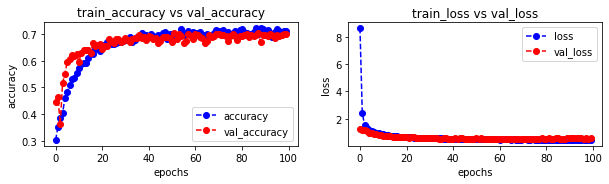

In [29]:
plot_accuracy_loss(history)

In [30]:

test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7015209197998047


<a id="7"></a> 
# <h1 style='background:#3b3a30; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#c1502e'><center>Testing our model</center></h1> 

In [31]:
# Testing an audio from test set

filename="/kaggle/input/musical-instruments-sound-dataset/Test_submission/Test_submission/Sad-Violin-Slow-K-www.fesliyanstudios.com.wav"
audio,sample_rate=librosa.load(filename,res_type='kaiser_fast')
mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
mfccs_scaled_features =np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)

predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)

prediction_class=LE.inverse_transform(predicted_label)
prediction_class

[-368.86142      12.001296    -44.862038     -3.9610407   -19.97207
   -6.939047    -32.388287    -22.195532     -3.5529785     8.108531
  -29.183025     -8.955498      5.3371787    -4.4798007    -5.6671853
   14.960435      6.517324     13.6678295    -7.2718925    -2.1415095
   14.366109     -1.8478435     1.3242339     3.254093      6.9168425
    2.1653857    -1.0724707    -2.2695527     2.0064406    -5.1669517
   -5.987627      4.621291     -4.027289     -2.4686213    -1.6929369
   -0.80811715    5.982032     -3.3799713    -7.8915057     4.13152   ]
[[-368.86142      12.001296    -44.862038     -3.9610407   -19.97207
    -6.939047    -32.388287    -22.195532     -3.5529785     8.108531
   -29.183025     -8.955498      5.3371787    -4.4798007    -5.6671853
    14.960435      6.517324     13.6678295    -7.2718925    -2.1415095
    14.366109     -1.8478435     1.3242339     3.254093      6.9168425
     2.1653857    -1.0724707    -2.2695527     2.0064406    -5.1669517
    -5.987627     

array(['Sound_Drum'], dtype='<U12')

In [32]:
# Let's play that sound

import IPython.display as ipd 
ipd.Audio(filename)

<a id="8"></a> 
# <h1 style='background:#3b3a30; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#c1502e'><center>Thank You</center></h1> 
 

### **You might like my another kernel[🐦GUIDE TO:Audio Processing & FE With Birds Sounds🐦](https://www.kaggle.com/code/soumendraprasad/guide-to-audio-processing-fe-with-birds-sounds/edit/run/114418780)** 

<img src="https://media.tenor.com/0MqQbvj3peYAAAAC/thinking-for-watching.gif" width= 700 height = 450 />

